In [1]:
import scipy.signal as sig
import math 
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import scipy.optimize as so
import os


In [2]:
def triangle(x,p,a,d,h):
    return (2*a/3.141592) * np.arcsin(np.sin((2/p)*3.151492*(x-d)))+h

In [3]:
def fit_function(x,p,a,d,h):
    return triangle(x,p,a,d,h)

In [20]:
def  plotV2A(fname):
    
    data=[]
    nhead = 12
    toVolt = 39.3216/((2**16) -1)
    L=[]
    
    
    fd = open(fname, 'rb')
    read_data = np.fromfile(file=fd, dtype=np.int16)#.reshape(shape)
    fd.close()
    p_guess = 200
    a_guess = 200
    d_guess=20
    h_guess=0        
    dat = toVolt*read_data[nhead:]
    xs = np.arange(len(dat))
    
    
    x = xs[1:1000:2]
    dat = dat[1:1000:2]
    y = triangle(x, p_guess,a_guess,d_guess,h_guess)
    p_opt, p_cov = so.curve_fit(fit_function, x ,dat,p0=[p_guess, a_guess,d_guess,h_guess] )
    print(p_cov)
    print("Varianz",np.sqrt(p_cov[1][1]))
    y_fit = fit_function(x, p_opt[0], p_opt[1],p_opt[2],p_opt[3])
    plt.plot(x, y_fit, color='orange', label='Fitted Curve')                         
    plt.scatter(x, dat,marker=".")
    plt.grid(True)
    plt.show()  
    print('Optimized y-verschiebung value:', p_opt[3])
    print('Optimized x-Verschiebung value:', p_opt[2])
    print('Optimized Amplitude value:', p_opt[1])
    print('Optimized Periode value:', p_opt[0])                         
    print(dat[:20])
    
    
    #difference = dat-y_fit
    #plt.plot(x, difference)
    #plt.show()
 

In [21]:
def  plotlineV2A(fname):
    
    data=[]
    nhead = 12
    toVolt = 39.3216/((2**16) -1)
    L=[]
    
    fd = open(fname, 'rb')
    read_data = np.fromfile(file=fd, dtype=np.int16)#.reshape(shape)
    fd.close()
    dat = toVolt*read_data[nhead:]
    
    plt.scatter(dat[:1000:2], dat[1:1000:2],marker=".")
    #plt.plot(xs, dat)
    print(dat[:20])
    line_coefficients = np.polyfit(dat[:1000:2], dat[1:1000:2], 1)
    line_slope = line_coefficients[0]  
    

    line_intercept = line_coefficients[1]
    line_fit = line_slope * dat[:1000:2] + line_intercept
    plt.plot(dat[:1000:2], line_fit, color='orange', label='Fitted Line')

    plt.grid(True)
    plt.show()

    print("Slope of the fitted line:", line_slope)
    print(dat[:20])
    print("m=",line_slope)
    print(dat[:20])

In [22]:
def readsquidgain(fname):
    data=[]
    nhead = 12
    toVolt = 39.3216/((2**16) -1)
    L=[]
    
    
    fd = open(fname, 'rb')
    read_data = np.fromfile(file=fd, dtype=np.int16)#.reshape(shape)
    fd.close()
    p_guess = 200
    a_guess = 200
    d_guess=20
    h_guess=0
            
    dat = toVolt*read_data[nhead:]
    xs = np.arange(len(dat))
    
    
    x = xs[1:1000:2]
    dat1 = dat[1:1000:2]
    y = triangle(x, p_guess,a_guess,d_guess,h_guess)
    p_opt, p_cov = so.curve_fit(fit_function, x ,dat1,p0=[p_guess, a_guess,d_guess,h_guess] )
    y_fit = fit_function(x, p_opt[0], p_opt[1],p_opt[2],p_opt[3])
    
    #print('Optimized d value:', p_opt[2])
    print('Optimized Amplitude value:', p_opt[1])
    a=p_opt[1]
    #print('Optimized p value:', p_opt[0])
    
    line_coefficients = np.polyfit(dat[:1000:2], dat[1:1000:2], 1)
    line_slope = line_coefficients[0]  
    plt.show()
    print("V over uA:",a/(2.5),"V/uA")
    return a/(2.5)
      

squidchar_Triangle_S1L
Optimized Amplitude value: 0.431302469818654
V over uA: 0.1725209879274616 V/uA
[[ 1.46102202e-06  8.70078228e-10 -3.37592753e-06 -2.26137604e-09]
 [ 8.70078228e-10  6.64949104e-10 -2.88720374e-09 -1.34810372e-12]
 [-3.37592753e-06 -2.88720374e-09  1.07770971e-05  5.22527677e-09]
 [-2.26137604e-09 -1.34810372e-12  5.22527677e-09  2.24888291e-10]]
Varianz 2.578660706800291e-05


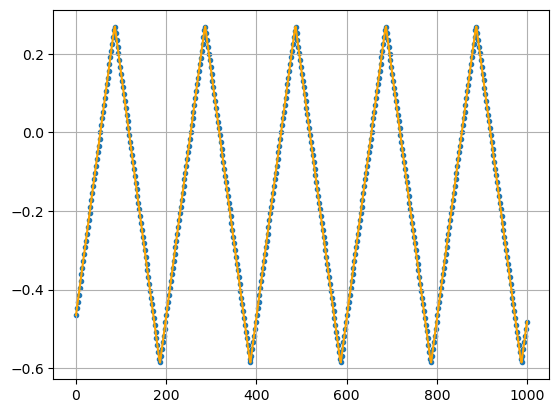

Optimized y-verschiebung value: -0.15813571686346084
Optimized x-Verschiebung value: 36.56777296682196
Optimized Amplitude value: 0.431302469818654
Optimized Periode value: 200.63079596432598
[-0.4650071  -0.44760683 -0.43080657 -0.41340631 -0.39600604 -0.37860578
 -0.36120551 -0.34440526 -0.32700499 -0.30960472 -0.29220446 -0.2754042
 -0.25800394 -0.24060367 -0.22320341 -0.20580314 -0.18900288 -0.17160262
 -0.15420235 -0.13680209]
Optimized Amplitude value: 0.431302469818654
V over uA: 0.1725209879274616 V/uA
squidchar_Triangle_S2L
No data taken
squidchar_Triangle_S3L
Optimized Amplitude value: 0.43141081784022134
V over uA: 0.17256432713608855 V/uA
[[ 1.51086319e-06  9.01493199e-10 -3.49101015e-06 -2.33912684e-09]
 [ 9.01493199e-10  6.87989832e-10 -3.01492592e-09 -1.39481552e-12]
 [-3.49101015e-06 -3.01492592e-09  1.11444487e-05  5.40480035e-09]
 [-2.33912684e-09 -1.39481552e-12  5.40480035e-09  2.32680757e-10]]
Varianz 2.6229560274181845e-05


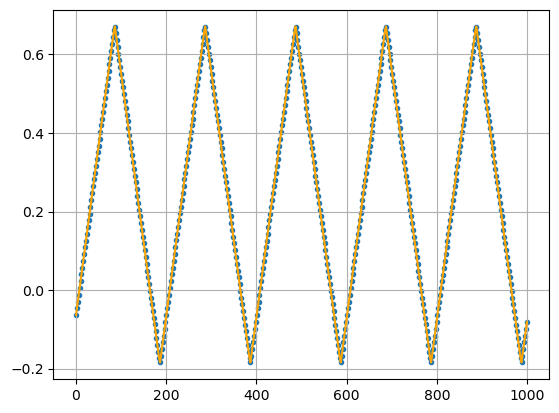

Optimized y-verschiebung value: 0.24347106817887632
Optimized x-Verschiebung value: 36.58565939506951
Optimized Amplitude value: 0.43141081784022134
Optimized Periode value: 200.6298547040701
[-0.06360097 -0.04680071 -0.02940045 -0.01200018  0.00540008  0.02280035
  0.04020061  0.05700087  0.07440114  0.0918014   0.10920167  0.12600192
  0.14340219  0.16080245  0.17820272  0.19500298  0.21240324  0.22980351
  0.24720377  0.26460404]
Optimized Amplitude value: 0.43141081784022134
V over uA: 0.17256432713608855 V/uA
squidchar_Triangle_S4L
Optimized Amplitude value: 0.4306882731163144
V over uA: 0.17227530924652576 V/uA
[[ 1.19119121e-06  7.08980908e-10 -2.75266971e-06 -1.84111275e-09]
 [ 7.08980908e-10  5.40603595e-10 -2.28520879e-09 -1.09600786e-12]
 [-2.75266971e-06 -2.28520879e-09  8.78761697e-06  4.25454413e-09]
 [-1.84111275e-09 -1.09600786e-12  4.25454413e-09  1.82834177e-10]]
Varianz 2.3250883753807307e-05


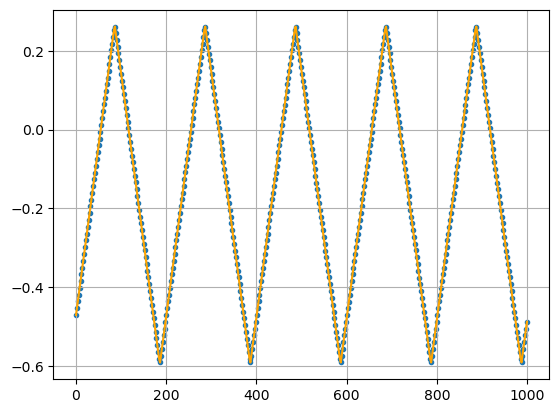

Optimized y-verschiebung value: -0.16485627711488282
Optimized x-Verschiebung value: 36.515498851607916
Optimized Amplitude value: 0.4306882731163144
Optimized Periode value: 200.63031652685316
[-0.47100719 -0.45360692 -0.43620666 -0.4194064  -0.40200613 -0.38460587
 -0.36780561 -0.35040535 -0.33300508 -0.31560482 -0.29880456 -0.28140429
 -0.26400403 -0.24660376 -0.22980351 -0.21240324 -0.19500298 -0.17820272
 -0.16080245 -0.14340219]
Optimized Amplitude value: 0.4306882731163144
V over uA: 0.17227530924652576 V/uA
squidchar_Triangle_S5L
Optimized Amplitude value: -0.4306437947440437
V over uA: -0.17225751789761748 V/uA
[[ 1.49328560e-06 -8.90315821e-10 -3.45045822e-06  2.30781383e-09]
 [-8.90315821e-10  6.77576373e-10  2.95858503e-09 -1.37370310e-12]
 [-3.45045822e-06  2.95858503e-09  1.10150468e-05 -5.33254375e-09]
 [ 2.30781383e-09 -1.37370310e-12 -5.33254375e-09  2.29158883e-10]]
Varianz 2.6030297216558727e-05


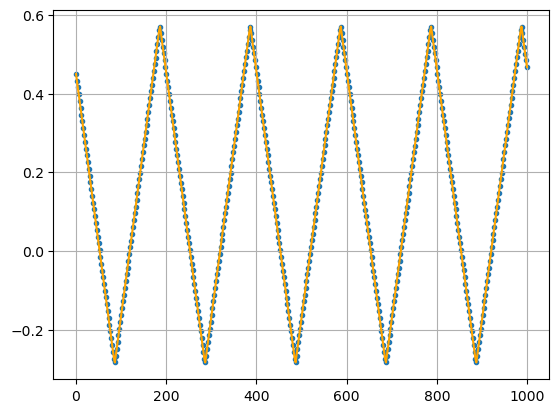

Optimized y-verschiebung value: 0.1436035634445041
Optimized x-Verschiebung value: 36.57547028823591
Optimized Amplitude value: -0.4306437947440437
Optimized Periode value: 200.62928809972254
[0.45000687 0.43320661 0.41580634 0.39840608 0.38100581 0.36420556
 0.34680529 0.32940503 0.31200476 0.2952045  0.27780424 0.26040397
 0.24300371 0.22620345 0.20880319 0.19140292 0.17460266 0.1572024
 0.13980213 0.12300188]
Optimized Amplitude value: -0.4306437947440437
V over uA: -0.17225751789761748 V/uA
squidchar_Triangle_S6L
Optimized Amplitude value: 0.43048849947575757
V over uA: 0.17219539979030302 V/uA
[[ 1.54074605e-06  9.17884450e-10 -3.56011013e-06 -2.38029830e-09]
 [ 9.17884450e-10  6.98604469e-10 -3.05408961e-09 -1.41633578e-12]
 [-3.56011013e-06 -3.05408961e-09  1.13650793e-05  5.50001113e-09]
 [-2.38029830e-09 -1.41633578e-12  5.50001113e-09  2.36270665e-10]]
Varianz 2.6431126897285257e-05


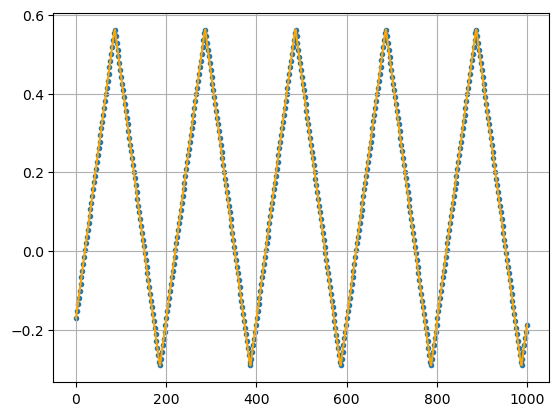

Optimized y-verschiebung value: 0.13596192528079398
Optimized x-Verschiebung value: 36.57706534095096
Optimized Amplitude value: 0.43048849947575757
Optimized Periode value: 200.62953186675628
[-0.1704026  -0.15360234 -0.13560207 -0.11880181 -0.10140155 -0.08460129
 -0.06720103 -0.04980076 -0.03240049 -0.01560024  0.00180003  0.01920029
  0.03600055  0.05340081  0.07080108  0.08820135  0.10560161  0.12240187
  0.13980213  0.1572024 ]
Optimized Amplitude value: 0.43048849947575757
V over uA: 0.17219539979030302 V/uA
squidchar_Triangle_S7L
No data taken
squidchar_Triangle_S8L
Optimized Amplitude value: -0.430739767584253
V over uA: -0.17229590703370118 V/uA
[[ 1.47008529e-06 -8.76038417e-10 -3.39681717e-06  2.27245701e-09]
 [-8.76038417e-10  6.67341908e-10  2.92127182e-09 -1.35295396e-12]
 [-3.39681717e-06  2.92127182e-09  1.08437754e-05 -5.25079648e-09]
 [ 2.27245701e-09 -1.35295396e-12 -5.25079648e-09  2.25697556e-10]]
Varianz 2.5832961648611412e-05


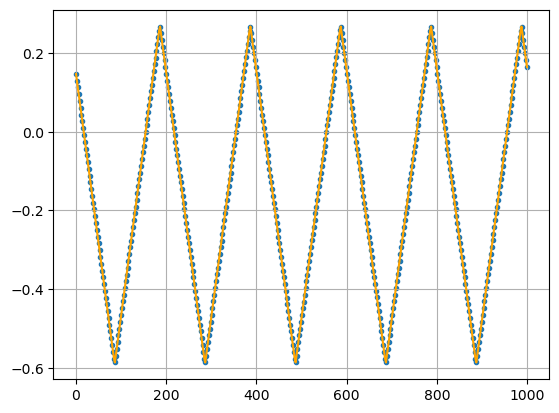

Optimized y-verschiebung value: -0.15946882469188228
Optimized x-Verschiebung value: 36.58065948943024
Optimized Amplitude value: -0.430739767584253
Optimized Periode value: 200.6296999949912
[ 0.14700224  0.13020199  0.11280172  0.09540146  0.07800119  0.06120093
  0.04380067  0.0264004   0.00900014 -0.00780012 -0.02520038 -0.04260065
 -0.06000092 -0.07680117 -0.09420144 -0.1116017  -0.12900197 -0.14580222
 -0.16320249 -0.18060276]
Optimized Amplitude value: -0.430739767584253
V over uA: -0.17229590703370118 V/uA


In [23]:
data=[]
L=[]
for i in range(8):
    file_path = r"C:\Users\n1cos\Downloads\Run47Squid\data\squidchar_5uApp_triangle_S" + str(i + 1) + "L.bin"
    print("squidchar_Triangle_S" + str(i+1)+"L")
    
    if os.path.isfile(file_path):
        readsquidgain(file_path)
        plotV2A(file_path)
        #plotlineV2A(file_path)
        L=readsquidgain(file_path)
        data.append(L)
        L=[]
    else:
        print("No data taken")

In [8]:
row_names = ["S1L", "S3L", "S4L", "S5L", "S6L", "S8L"]
columns=["V over uA"]
df = pd.DataFrame(data,index=row_names,columns=columns)
df= df['V over uA'].round(4)
print(df)

S1L    0.1725
S3L    0.1726
S4L    0.1723
S5L   -0.1723
S6L    0.1722
S8L   -0.1723
Name: V over uA, dtype: float64


squidchar_Triangle_S1M
Optimized Amplitude value: 4.23694752146156
V over uA: 1.694779008584624 V/uA
Varianz 0.00020956195443677517


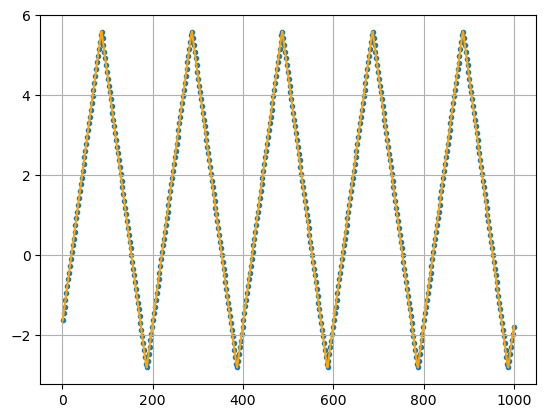

Optimized y-verschiebung value: 1.39754863209146
Optimized x-Verschiebung value: 36.575391994944965
Optimized Amplitude value: 4.23694752146156
Optimized Periode value: 200.63020491596228
[-1.61942471 -1.44962212 -1.27921952 -1.11061695 -0.94021435 -0.76981175
 -0.59940915 -0.43200659 -0.26100398 -0.09240141  0.0786012   0.24720377
  0.41700636  0.58560894  0.75601154  0.92581413  1.09501671  1.26361928
  1.4352219   1.60382447]
Optimized Amplitude value: 4.23694752146156
V over uA: 1.694779008584624 V/uA
squidchar_Triangle_S2M
No data taken
squidchar_Triangle_S3M
Optimized Amplitude value: 4.239181375347554
V over uA: 1.6956725501390217 V/uA
Varianz 0.00021629976023063122


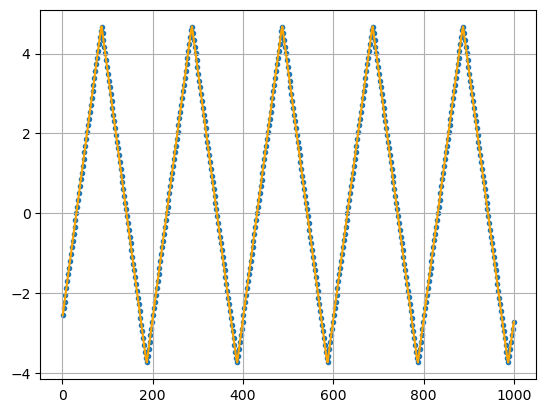

Optimized y-verschiebung value: 0.4737826333352463
Optimized x-Verschiebung value: 36.58615896536858
Optimized Amplitude value: 4.239181375347554
Optimized Periode value: 200.63046149239045
[-2.54523884e+00 -2.37543625e+00 -2.20563366e+00 -2.03523106e+00
 -1.86542846e+00 -1.69502586e+00 -1.52642329e+00 -1.35602069e+00
 -1.18681811e+00 -1.01761553e+00 -8.47812937e-01 -6.78610355e-01
 -5.07607745e-01 -3.38405164e-01 -1.69202582e-01  6.00009155e-04
  1.69802591e-01  3.40205191e-01  5.09407773e-01  6.79210364e-01]
Optimized Amplitude value: 4.239181375347554
V over uA: 1.6956725501390217 V/uA
squidchar_Triangle_S4M
Optimized Amplitude value: 4.231338937479697
V over uA: 1.6925355749918787 V/uA
Varianz 0.00017819895265095694


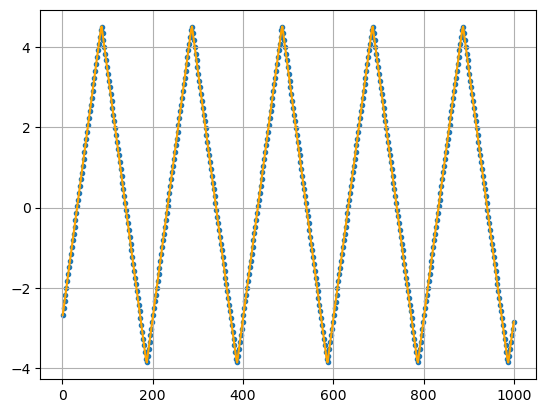

Optimized y-verschiebung value: 0.32886136981523056
Optimized x-Verschiebung value: 36.520406645221826
Optimized Amplitude value: 4.231338937479697
Optimized Periode value: 200.62974098193968
[-2.67904088 -2.50923829 -2.3394357  -2.17023312 -2.00043052 -1.83122794
 -1.66142535 -1.49162276 -1.32242018 -1.15141757 -0.98401501 -0.81421242
 -0.64500984 -0.47460724 -0.30660468 -0.13800211  0.03180049  0.19980305
  0.36900563  0.53880822]
Optimized Amplitude value: 4.231338937479697
V over uA: 1.6925355749918787 V/uA
squidchar_Triangle_S5M
Optimized Amplitude value: -4.230474640013225
V over uA: -1.69218985600529 V/uA
Varianz 0.0002128436808896362


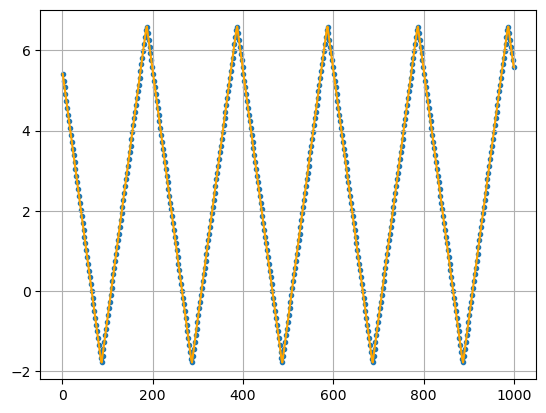

Optimized y-verschiebung value: 2.404849105001552
Optimized x-Verschiebung value: 36.57690465660467
Optimized Amplitude value: -4.230474640013225
Optimized Periode value: 200.63031800950472
[5.41688266 5.24708006 5.07847749 4.9086749  4.73887231 4.57086975
 4.39926713 4.22946454 4.06086196 3.89165938 3.72365682 3.55265421
 3.38465165 3.21604907 3.04504646 2.87584388 2.70604129 2.53743872
 2.36763613 2.19843355]
Optimized Amplitude value: -4.230474640013225
V over uA: -1.69218985600529 V/uA
squidchar_Triangle_S6M
Optimized Amplitude value: 4.229289514063523
V over uA: 1.6917158056254091 V/uA
Varianz 0.00021767589102163724


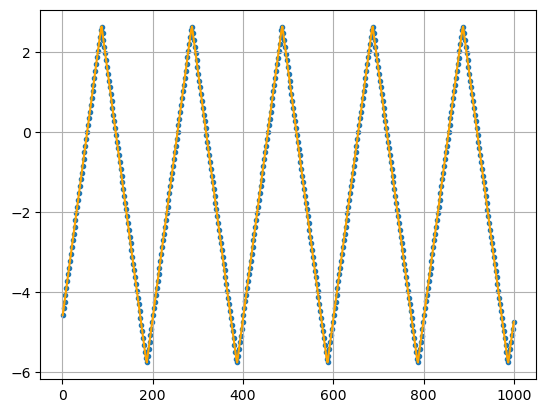

Optimized y-verschiebung value: -1.560010218798749
Optimized x-Verschiebung value: 36.57626514980094
Optimized Amplitude value: 4.229289514063523
Optimized Periode value: 200.63026565967704
[-4.57206976 -4.40346719 -4.23186457 -4.06266199 -3.89345941 -3.72425683
 -3.55505425 -3.38645167 -3.21664908 -3.04564647 -2.87644389 -2.70604129
 -2.53743872 -2.36883615 -2.20023357 -2.03103099 -1.86182841 -1.69322584
 -1.52402325 -1.35482067]
Optimized Amplitude value: 4.229289514063523
V over uA: 1.6917158056254091 V/uA
squidchar_Triangle_S7M
No data taken
squidchar_Triangle_S8M
Optimized Amplitude value: -4.232038721059961
V over uA: -1.6928154884239845 V/uA
Varianz 0.00021580291271949896


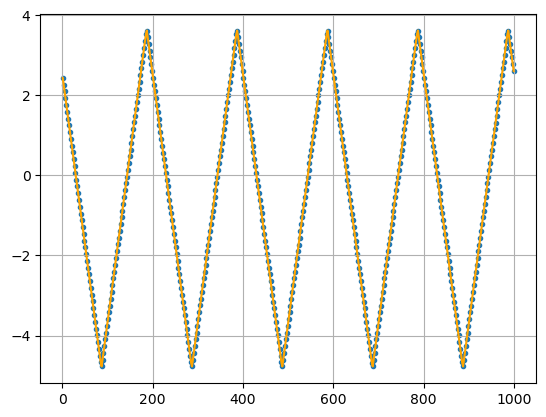

Optimized y-verschiebung value: -0.5765825182086107
Optimized x-Verschiebung value: 36.58124864856839
Optimized Amplitude value: -4.232038721059961
Optimized Periode value: 200.6301250343301
[ 2.43663718  2.26803461  2.09883203  1.92842943  1.75802683  1.58762423
  1.42022167  1.24981907  1.08181651  0.91201392  0.74221133  0.57300874
  0.40200613  0.23340356  0.065401   -0.10560161 -0.27240416 -0.44340677
 -0.61320936 -0.78181193]
Optimized Amplitude value: -4.232038721059961
V over uA: -1.6928154884239845 V/uA


In [9]:
data=[]
L=[]
for i in range(8):
    file_path = r"C:\Users\n1cos\Downloads\Run47Squid\data\squidchar_5uApp_triangle_S" + str(i + 1) + "M.bin"
    print("squidchar_Triangle_S" + str(i+1)+"M")
    
    if os.path.isfile(file_path):
        readsquidgain(file_path)
        plotV2A(file_path)
        #plotlineV2A(file_path)
        L=readsquidgain(file_path)
        data.append(L)
        L=[]
    else:
        print("No data taken")

In [10]:
row_names = ["S1M", "S3M", "S4M", "S5M", "S6M", "S8M"]
columns=["V over uA"]
df = pd.DataFrame(data,index=row_names,columns=columns)
df= df['V over uA'].round(3)
print(df)

S1M    1.695
S3M    1.696
S4M    1.693
S5M   -1.692
S6M    1.692
S8M   -1.693
Name: V over uA, dtype: float64


In [11]:
print(data)

[1.694779008584624, 1.6956725501390217, 1.6925355749918787, -1.69218985600529, 1.6917158056254091, -1.6928154884239845]
